# <center> <font color = "blue" weight = "bold"> Segmentation des clients du site de E-Commerce Olist

Olist souhaite obtenir une segmentation de ses clients utilisable au quotidien par leur équipe marketing dans leurs campagnes de communication. L'objectif est de comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles anonymisées.

Nous allons donc fournir ici une description actionable de la segmentation et de sa logique sous-jacente pour une utilisation optimale. Nous devrons également fournir une analyse de la stabilité des segments au cours du temps (dans le but d'établir un contrat de maintenance).

Nous utilisererons donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires.

## <font color = "blue"> Procédé 


1. Clustering avec l'algorithme du K-Means sans réduction de dimension
2. Réduction dimensionnelle - PCA
3. K-Means après réduction de dimenssions
4. Stabilité à l'initialisation du K-Means
5. Clustering avec l'algorithme DBScan
6. Clustering agglomératif
7. Stabilité temporelle de la segmentation

### <font color = "blue"> Importation des librairies 

In [1]:
# Manipulation des données
import numpy as np
import pandas as pd

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation interactive
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px

# Pré-traitement et modélisation des données
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

# Librairies pour les modélisations
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward

# Visualisation et évaluation des clusters
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Evaluation des durées
from time import time

# Ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

### <font color = "blue"> Importation des données 

In [2]:
data_model = pd.read_csv("data1.csv", index_col=0)
data_model.head(3)

,order_purchase_timestamp,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,...,customer_city_varzea paulista,customer_city_viamao,customer_city_vicosa,customer_city_vila velha,customer_city_vinhedo,customer_city_vitoria,customer_city_vitoria da conquista,customer_city_volta redonda,customer_city_votorantim,délai_livraison
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
"('0000366f3b9a7992bf8c76cfdf3221e2', '0000366f3b9a7992bf8c76cfdf3221e2', '0000366f3b9a7992bf8c76cfdf3221e2')",2018-05-10 10:56:27,1,-23.340235,-46.830140,129.9,12.00,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,6.411227
"('0000b849f77a49e4a4ce2b2a4ca5be3f', '0000b849f77a49e4a4ce2b2a4ca5be3f', '0000b849f77a49e4a4ce2b2a4ca5be3f')",2018-05-07 11:11:27,1,-23.559115,-46.787626,18.9,8.29,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3.285590
"('0000f46a3911fa3c0805444483337064', '0000f46a3911fa3c0805444483337064', '0000f46a3911fa3c0805444483337064')",2017-03-10 21:05:03,1,-27.542880,-48.633426,69.0,17.22,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,25.731759


In [3]:
# Création d'une copie du jeu de donnée
data_copie = data_model.copy()
# Je mets de côté la variable "order_purchase_timestamp", elle sera utile plus tard pour l'évaluation de la stabilité temporelle
data_olist = data_copie.drop("order_purchase_timestamp", axis = 1)

### <font color = "blue"> 1. Segmentation avec l'algorithme du K-Means

#### <font color = "blue"> 1.1 Prepocessing
    
Les données ont déjà été encodé, on peut alors procéder à la standardisation.

In [4]:
scaler = MinMaxScaler()
scaler.fit_transform(data_olist)
data = pd.DataFrame(scaler.fit_transform(data_olist), columns = data_olist.columns)
print("Les cinq premières lignes du jeu de données à utiliser pour la modélisation")
data.head()

Les cinq premières lignes du jeu de données à utiliser pour la modélisation


,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,comment_length,...,customer_city_varzea paulista,customer_city_viamao,customer_city_vicosa,customer_city_vila velha,customer_city_vinhedo,customer_city_vitoria,customer_city_vitoria da conquista,customer_city_volta redonda,customer_city_votorantim,délai_livraison
0,1.0,0.136407,0.404077,0.019164,0.029291,0.0,0.041667,0.0,0.0,0.533654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028283
1,1.0,0.133522,0.404742,0.002680,0.020235,0.0,0.041667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013243
2,1.0,0.081017,0.375876,0.010120,0.042033,0.0,0.041667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121252
3,1.0,0.426731,0.378226,0.003733,0.043034,0.0,0.041667,0.0,0.0,0.057692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093850
4,1.0,0.134228,0.394075,0.026603,0.041227,0.0,0.041667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060667


#### <font color = "blue"> 1.2 Recherche du nombre optimal de groupe
    
Je vais me servir de **KElbowVisualizer** de la librairie Yellowbrick pour implémenter la méthode du "coude" afin de sélectionner le nombre optimal de groupe. Ensuite j'analyserais le score de silhouette et la distance intercluster pour valider le nombre de groupe obtenu.

Méthode du coude pour déterminer le nombre de groupes à former


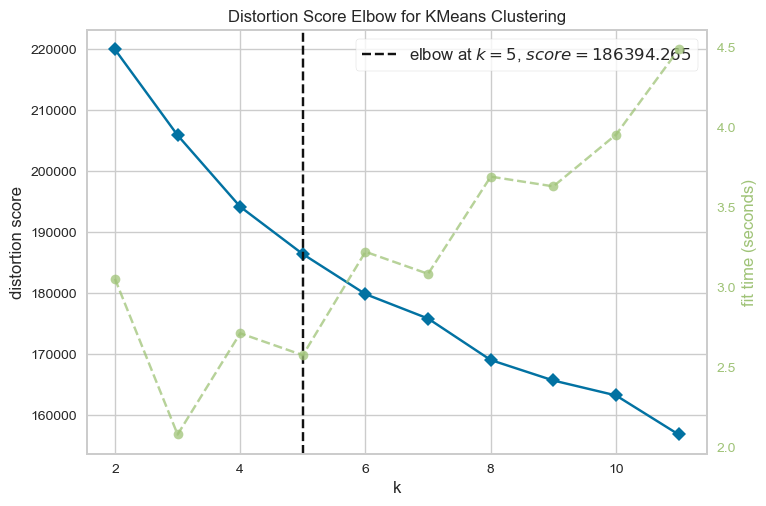

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
print("Méthode du coude pour déterminer le nombre de groupes à former")

# Instancier le modèle de clustering et le visualiseur
model = KMeans(n_init = 10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(data)    # Adapter les données au visualiseur
visualizer.show()    # Visualisation de la figure

D'après le score de distorsion ci-dessus, le nombre optimal de groupe à former pour ce jeu de données est 5. <br>
Evaluons la densité et la séparation entre les groupes par l'analyse de silhouette.

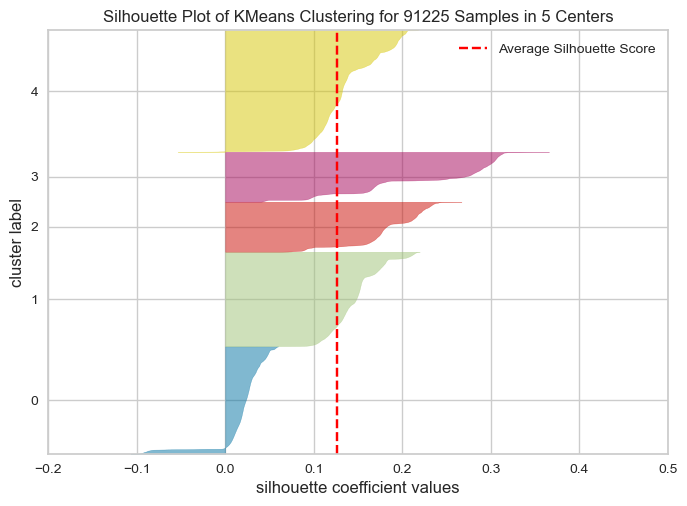

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 91225 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
# Instancier le modèle de clustering et le visualiseur 
model = KMeans(5, n_init = 10)
visualizer = SilhouetteVisualizer(model, colors = "yellowbrick")

visualizer.fit(data)    # Adapter les données au visualiseur
visualizer.show()    # Visualiser les silhouette et les scores

Le score de silhouette est très bas et pourtant les clusters semble plutôt bien séparés. On peut vérifier la séparation entre les clusters en observant la distant inter-clusters dans l'espace.

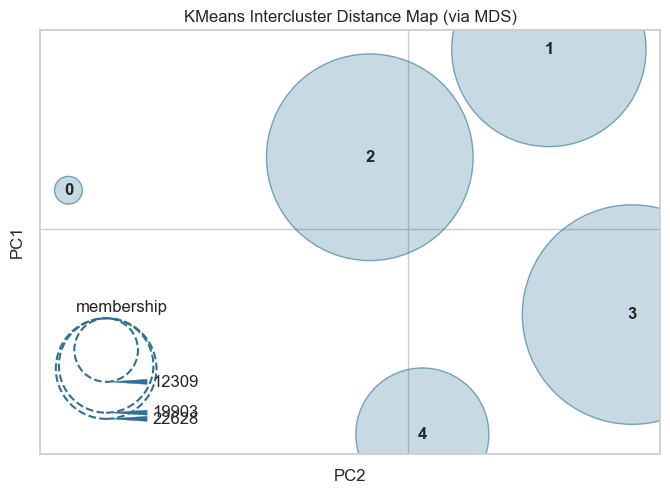

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [7]:
# Instancier le modèle de clustering et le visualiseur 
model = KMeans(5, n_init = 10)
visualizer = InterclusterDistance(model, normalized_stress = True)

visualizer.fit(data)    # Adapter les données au visualiseur
visualizer.show()    # Visualiser les silhouette et les scores

Effectivement les clusters sont biens séparés.

#### <font color = "blue"> 1.3. Analyse des clusters
    
A présent, ajustons le modèle de clustering K-means pour obtenir les clusters finaux.

In [8]:
# Initialisation de la segmentation
kmeans = KMeans(n_clusters = 5, n_init = 10)

# Ajuster le modèle et prédire les clusters
kmeans_predict = kmeans.fit_predict(data)
data["groupes"] = kmeans_predict

In [9]:
data.head()

,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,comment_length,...,customer_city_viamao,customer_city_vicosa,customer_city_vila velha,customer_city_vinhedo,customer_city_vitoria,customer_city_vitoria da conquista,customer_city_volta redonda,customer_city_votorantim,délai_livraison,groupes
0,1.0,0.136407,0.404077,0.019164,0.029291,0.0,0.041667,0.0,0.0,0.533654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028283,1
1,1.0,0.133522,0.404742,0.002680,0.020235,0.0,0.041667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013243,1
2,1.0,0.081017,0.375876,0.010120,0.042033,0.0,0.041667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121252,0
3,1.0,0.426731,0.378226,0.003733,0.043034,0.0,0.041667,0.0,0.0,0.057692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093850,0
4,1.0,0.134228,0.394075,0.026603,0.041227,0.0,0.041667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060667,1


Modification du tableau pour regrouper les données par groupe.

In [10]:
data_kmeans = data.groupby("groupes").mean()
data_kmeans

,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,comment_length,...,customer_city_varzea paulista,customer_city_viamao,customer_city_vicosa,customer_city_vila velha,customer_city_vinhedo,customer_city_vitoria,customer_city_vitoria da conquista,customer_city_volta redonda,customer_city_votorantim,délai_livraison
groupes,,,,,,,,,,,,,,,,,,,,,
0,0.997804,0.200093,0.415251,0.020618,0.057315,0.012223,0.035797,0.002090,0.000745,0.129425,...,0.000000,0.001622,0.001926,0.007365,0.000000,0.008311,0.002162,0.000000,0.000000,0.070009
1,0.997479,0.141904,0.396744,0.017060,0.038578,0.012341,0.037407,0.002987,0.000895,0.128013,...,0.002851,0.000000,0.000000,0.000000,0.003678,0.000000,0.000000,0.000000,0.003388,0.041450
2,0.996695,0.143946,0.461146,0.019274,0.051370,0.010281,0.039396,0.002476,0.001043,0.150772,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018758,0.000000,0.070697
3,0.996126,0.133364,0.407154,0.016625,0.035371,0.011044,0.039146,0.003210,0.000902,0.120238,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036218
4,0.993933,0.179915,0.410586,0.017965,0.065829,0.013384,0.041172,0.001911,0.000939,0.140889,...,0.000000,0.001579,0.002327,0.007479,0.000000,0.008892,0.001911,0.000000,0.000000,0.072939


In [11]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Groupe '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des groupes",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18, width=1200,
        height=1000 
    )

    fig.show()

In [12]:
plot_radars(data_kmeans, "groupes")

La segmentation est concentrée sur la localisation des clients. Pour supprimer cette observation, je vais mettre de côté les variables relatives aux Etats et villes des clients. Ainsi la localisation des clients sera représentée uniquement par la distance haversine et les coordonées géographiques.

In [13]:
# Selection des colonnes relatives aux villes et Etats
selected_columns = data.filter(like='city').columns.tolist() + data.filter(like='state').columns.tolist()
data_bis = data.drop(selected_columns, axis=1)
data_bis.head()

,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,comment_length,...,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,harvesine_distance,délai_livraison,groupes
0,1.0,0.136407,0.404077,0.019164,0.029291,0.0,0.041667,0.0,0.0,0.533654,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.039582,0.028283,1
1,1.0,0.133522,0.404742,0.002680,0.020235,0.0,0.041667,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038075,0.013243,1
2,1.0,0.081017,0.375876,0.010120,0.042033,0.0,0.041667,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.028298,0.121252,0
3,1.0,0.426731,0.378226,0.003733,0.043034,0.0,0.041667,0.0,0.0,0.057692,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.312150,0.093850,0
4,1.0,0.134228,0.394075,0.026603,0.041227,0.0,0.041667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.032797,0.060667,1


**_Clustering sans les villes et Etats_**

In [14]:
def cluster_visualization(data):
    # Standardisation des données
    scaler = MinMaxScaler()
    x = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    
    # Recherche du meilleur nombre de clusters (k) avec la méthode du coude
    model1 = KMeans(n_init=10, random_state=42)
    visualizer1 = KElbowVisualizer(model1, k=(2, 12))
    visualizer1.fit(x)
    
    # Affichage de la figure du coude
    visualizer1.show()
    
    # Sélection du meilleur nombre de clusters (k)
    best_k = visualizer1.elbow_value_
    
    # Visualisation des silhouettes et des scores
    model2 = KMeans(best_k, n_init=10)
    visualizer2 = SilhouetteVisualizer(model2, colors="yellowbrick")
    visualizer2.fit(x)
    
    # Visualisation de la figure des silhouettes et des scores
    visualizer2.show()
    
    # Visualisation des distances inter-cluster
    model3 = KMeans(best_k, n_init=10)
    visualizer3 = InterclusterDistance(model3, normalized_stress=True)
    visualizer3.fit(x)
    
    # Visualisation de la figure des distances inter-cluster
    visualizer3.show()


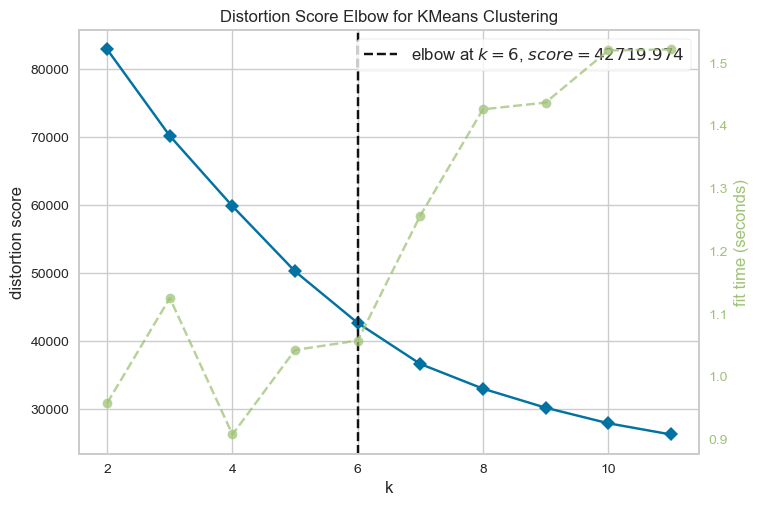

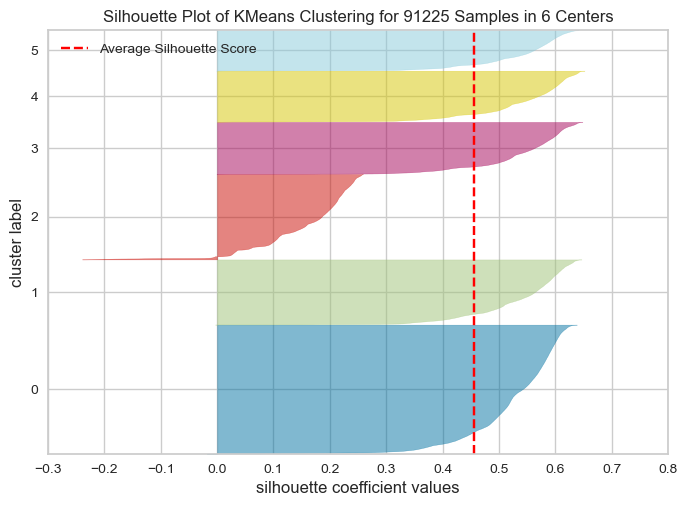

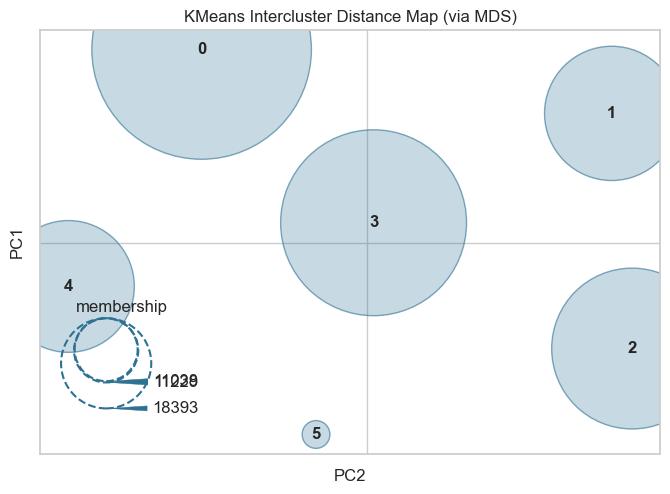

In [15]:
cluster_visualization(data_bis)

La suppression des variables relatives aux villes et Etats des clients permet d'améliorer le score de silhouette et la distance interclusters. Par ailleurs le nombre optimal de cluster passe de 5 mais 6. Je procède à la modélisation avec ces nouveaux paramètres.

In [16]:
# Initialisation de la segmentation
kmeans_bis = KMeans(n_clusters = 6, n_init = 10)
# Ajuster le modèle et prédire les clusters
kmeans_bis_predict = kmeans_bis.fit_predict(data_bis)
data_bis["groupes"] = kmeans_bis_predict

In [17]:
data_bis_kmeans = data_bis.groupby("groupes").mean()
data_bis_kmeans

,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,comment_length,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,harvesine_distance,délai_livraison
groupes,,,,,,,,,,,,,,,,,,,,,
0,0.996695,0.143946,0.461146,0.019274,0.051370,0.010281,0.039396,0.002476,0.001043,0.150772,...,0.010508,0.114383,0.309920,0.116434,0.076142,0.152425,0.074195,0.003392,0.079963,0.070697
1,0.997664,0.199791,0.415126,0.021833,0.058981,0.011335,0.036356,0.001914,0.000742,0.126815,...,0.012767,0.225723,0.001505,0.220167,0.142202,0.001606,0.126315,0.002314,0.127022,0.069236
2,0.994186,0.167290,0.409661,0.017177,0.059093,0.012891,0.041202,0.002198,0.001035,0.136603,...,0.000076,0.000575,0.994441,0.001396,0.000786,0.000249,0.001066,0.004756,0.091631,0.063942
3,0.997405,0.141860,0.396846,0.017501,0.039416,0.012012,0.037943,0.002883,0.000935,0.127114,...,0.013551,0.141233,0.372509,0.149639,0.090895,0.002059,0.077585,0.003323,0.043554,0.040976
4,0.998154,0.181701,0.409231,0.015875,0.045786,0.014886,0.034009,0.002983,0.000720,0.136532,...,0.000113,0.000117,0.002154,0.000097,0.000024,0.996820,0.000036,0.002606,0.101565,0.063275
5,0.996707,0.133362,0.407144,0.017346,0.032778,0.010804,0.038160,0.003322,0.000722,0.118002,...,0.021355,0.195614,0.006926,0.166001,0.119173,0.207833,0.102123,0.002884,0.039402,0.034580


In [18]:
plot_radars(data_bis_kmeans, "groupes")

La segmentation prends en compte toutes les variables. Mais avant d'analyser ces clusters et leurs caractéristiques. Je vais vérifier s'il est possible d'obtenir de bons résultats en réduisant le nombre de dimension.

### <font color = "blue"> 2. Réduction de dimension

<font color = "blue"> **_a) Standardisation_**

In [19]:
# Création d'une copie du jeu de données
data_copy = data_olist.copy()

selected_columns = data_copy.filter(like='city').columns.tolist() + data_copy.filter(like='state').columns.tolist()
data_copy.drop(selected_columns, axis=1, inplace=True)

# Stadardisation des données
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_copy)

<font color = "blue"> **_a) Réduction dimensionnelle_**

In [20]:
# Calcul des composantes principales
nbr_dim = data_scaled.shape[1] # Extraction du nombre de dimensions
pca = PCA(n_components=nbr_dim)
data_reduit = pca.fit_transform(data_scaled)

In [21]:
# Vérification que la somme cumulée des variances préservées est égal à 1
np.cumsum(pca.explained_variance_ratio_)

array([0.22989844, 0.36410747, 0.47779538, 0.58423633, 0.68060383,
       0.7589378 , 0.82593201, 0.87103102, 0.90803007, 0.94275839,
       0.95621452, 0.96688279, 0.97729028, 0.98608533, 0.98926623,
       0.99225679, 0.99486667, 0.9963888 , 0.99744353, 0.99824778,
       0.99896418, 0.99941676, 0.99977938, 0.99993744, 0.99998742,
       0.99999814, 0.99999941, 0.99999974, 1.        , 1.        ,
       1.        , 1.        , 1.        ])

**_Eboulis des valeurs propres_** <br> Je vais rechercher le nombre de composantes qui permet d'exprimer 95% de la variance.

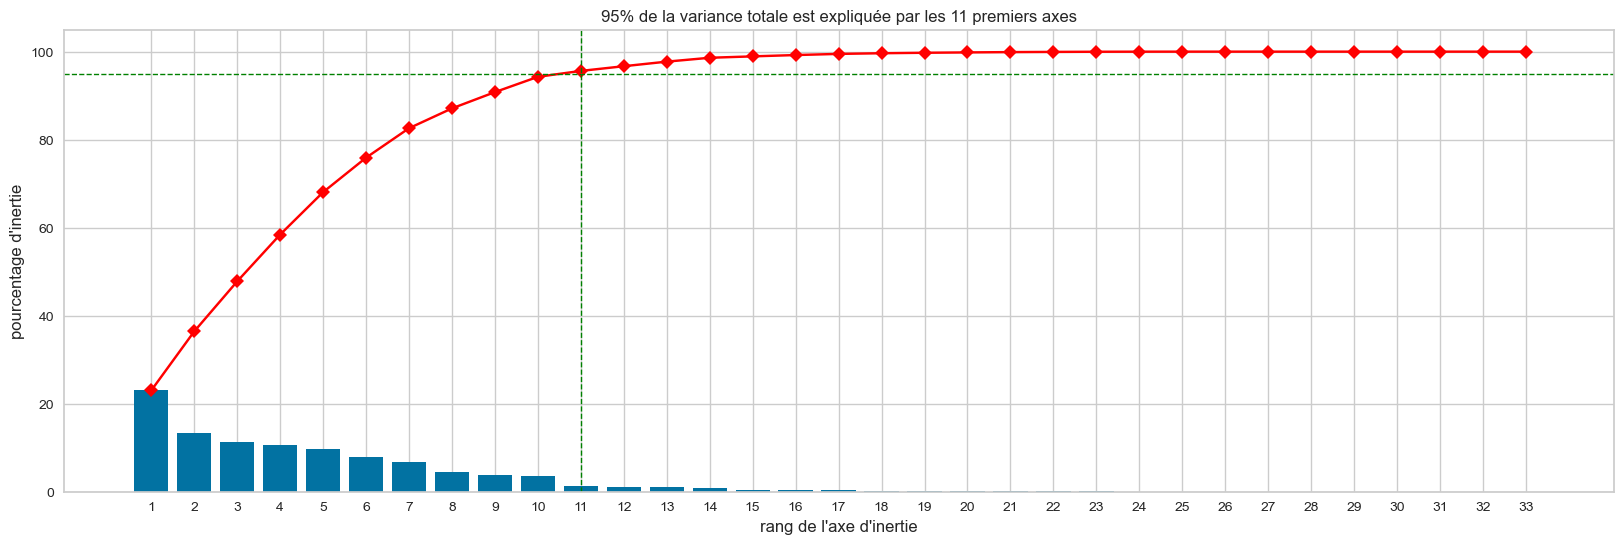

In [22]:
# Extraction du taux de variance expliqué par chaque composante
varexpl = pca.explained_variance_ratio_*100

# Paramètre de la figure
plt.figure(figsize=(20,6))

# Tracé du graphique en barres où les valeurs de varexpl sont représentées en fonction des rangs des axes d'inertie correspondants.
plt.bar(np.arange(len(varexpl))+1, varexpl)

# Calcul de la somme des valeurs de varexpl pour obtenir le pourcentage d'inertie totale.
cumSumVar = varexpl.cumsum()

# Extraction des indices pour lesquels la somme des valeurs de varexpl est supérieure à 95%
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red", marker='D')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

# Configuration des axes et titre
plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée par les {} premiers axes".format(
    limit, min_plans, color = "blue", fontsize = 20, fontweight = "bold", fontstyle = "iatlic"))

# Imprimer le graphique
plt.show()

Ce n'est qu'à partir du douzième point que nous avons 95% de la variable expliquée.

In [23]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation = 0):
    
    fig=plt.figure(figsize=(20, n_comp*11))
    count=1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.58,top=0.9)
            ax=plt.subplot(int(n_comp/2), 3, count)
            ax.set_aspect('equal', adjustable='box') 
            
            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                ax.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #ajouter les axes 
            ax.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            ax.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1, 
                                          round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, 
                                          round(100*pca.explained_variance_ratio_[d2],1)))

            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            count+=1
            
    plt.suptitle("Cercles des corrélations sur les {} premiers axes".format(n_comp),
                 y=.9, color="blue", fontsize=18)        
    plt.show()

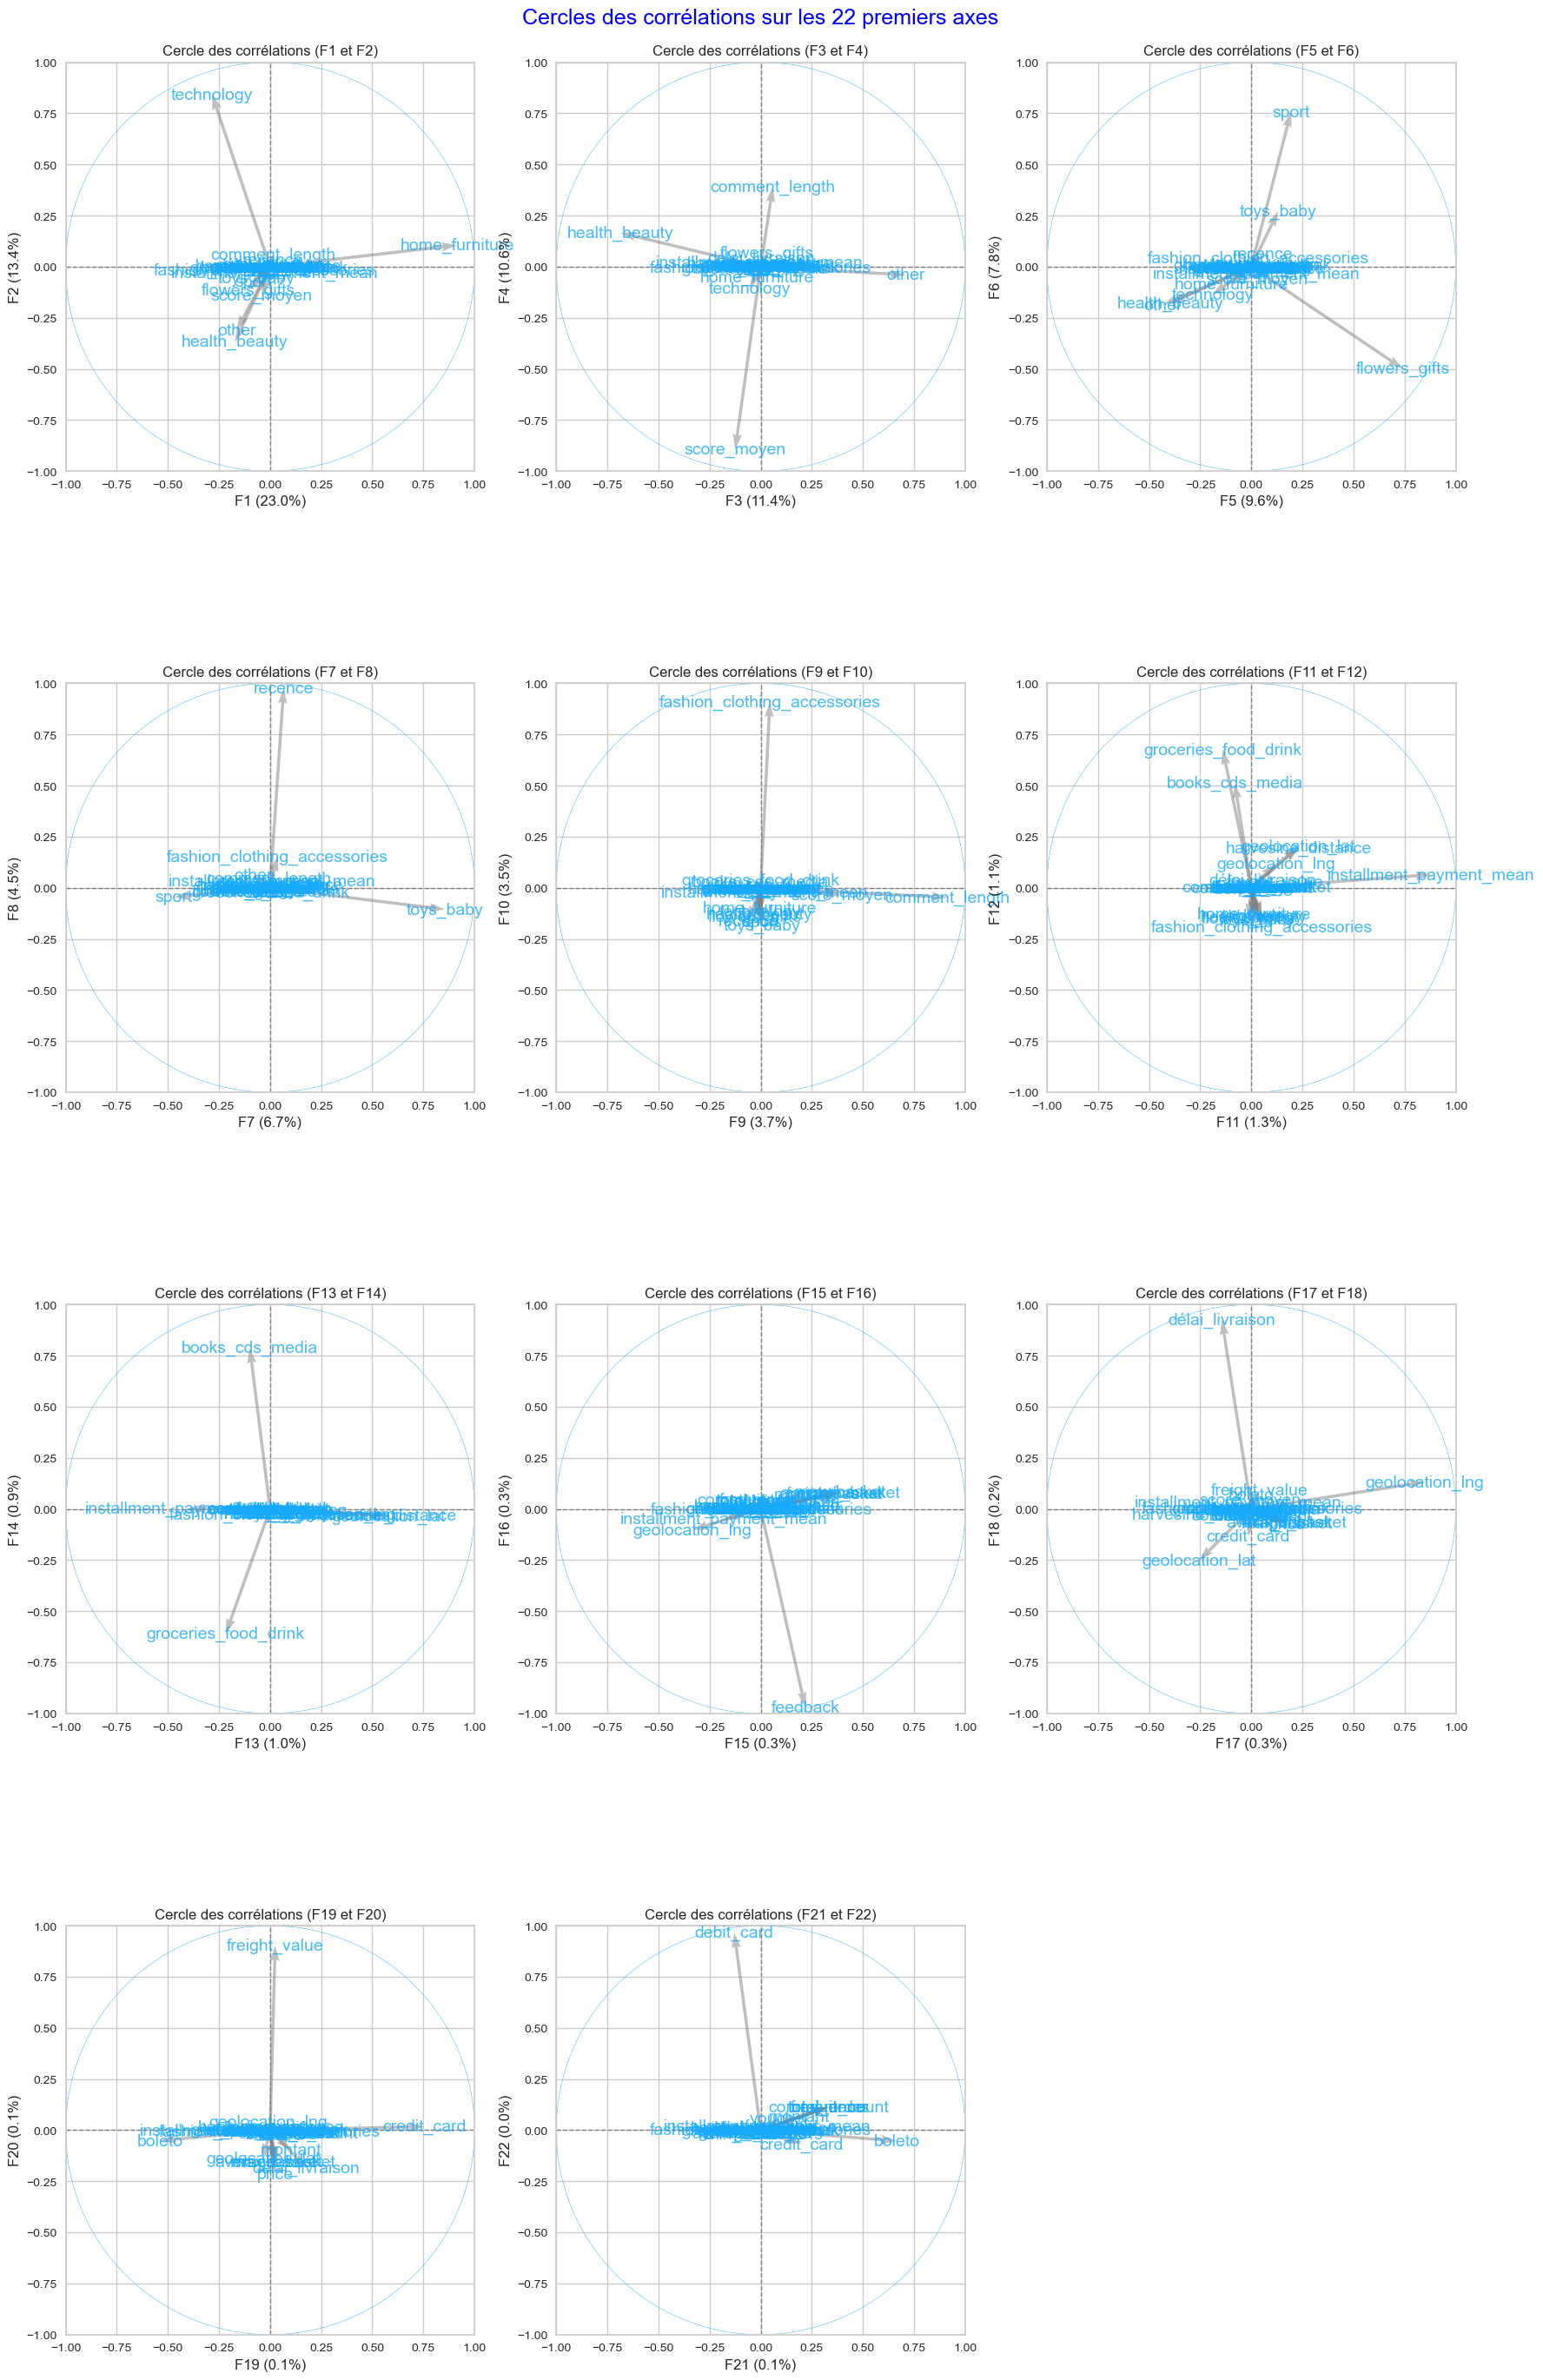

In [24]:
# Espace des composants principaux
pcs = pca.components_

# Plot correlation circle
cerle_corr(pcs, 22, pca, [(0,1),(2,3),(4,5), (6,7),(8,9),(10,11),(12,13), 
                          (14,15),(16,17),(18,19),(20,21)], 
                          labels = np.array(data_copy.columns))

La représentation des variable n'est pas très lisible sur les différents cercles. Je vais tenter de corriger cela en affichant des figures interactives avec plotly.

In [25]:
def plotly_corr(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0):
    fig = go.Figure()

    color_palette = np.linspace(0, 1, len(axis_ranks))

    for i, (d1, d2) in enumerate(axis_ranks):
        if i < n_comp:
            fig.add_trace(go.Scatter(
                x=pcs[d1, :],
                y=pcs[d2, :],
                mode='markers',
                marker=dict(
                    size=8,
                    color=color_palette[i],
                    opacity=0.5,
                    colorscale='Viridis'
                ),
                text=labels,
                hovertemplate='%{text}<extra></extra>',
                name=f'F{d1+1} vs F{d2+1}'
            ))

    fig.update_layout(
        title='Cercle des corrélations',
        xaxis=dict(
            title=f'F{i+1} ({round(100 * pca.explained_variance_ratio_[i], 1)}%)',
            range=[-1, 1]
        ),
        yaxis=dict(
            title=f'F{i+2} ({round(100 * pca.explained_variance_ratio_[i+1], 1)}%)',
            range=[-1, 1]
        ),
        showlegend=True,
        legend=dict(
            title='Composantes'
        )
    )

    fig.show()


In [26]:
# Plot correlation circle
plotly_corr(pcs, 22, pca, [(0,1),(2,3),(4,5), (6,7),(8,9),(10,11),(12,13), 
                          (14,15),(16,17),(18,19),(20,21)], 
                          labels = np.array(data_copy.columns))

Les catégories de produits sont représentés sur tous les axes, on peut en plus remarquer que plusieurs axes représentent les mêmes variables. Pour savoir quelle axe représente au mieux quelles variables, je vais tracé une matrix de corrélation entre les variables et les composantes (axes).

In [27]:
sqrt_valprop = np.sqrt(pca.explained_variance_)

pcs_top24 = pcs[:22, :]
corvar = pcs_top24.T * sqrt_valprop[:22]

corr_matrix = pd.DataFrame(corvar, columns=['CORR_F{}'.format(i+1) for i in range(22)],
                           index=data_copy.columns)

In [28]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,CORR_F1,CORR_F2,CORR_F3,CORR_F4,CORR_F5,CORR_F6,CORR_F7,CORR_F8,CORR_F9,CORR_F10,CORR_F11,CORR_F12,CORR_F13,CORR_F14,CORR_F15,CORR_F16,CORR_F17,CORR_F18,CORR_F19,CORR_F20,CORR_F21,CORR_F22
feedback,-0.001458,-0.000049,0.000523,-0.000156,0.000254,-0.000429,0.000380,-0.001218,0.000332,-0.000079,-0.000807,0.000097,0.000468,0.000092,0.012726,-0.054781,-0.001621,-0.000408,0.001589,-0.000289,0.002429,0.000445
geolocation_lat,-0.005200,0.000771,-0.001037,0.004750,0.000970,-0.001949,-0.000352,0.002997,0.000386,-0.000370,0.027470,0.021628,0.060872,-0.003315,0.000635,0.000672,-0.013507,-0.010155,-0.001104,-0.004090,-0.000736,-0.000239
geolocation_lng,-0.001164,0.000422,-0.000637,0.004160,0.000605,-0.001307,-0.000175,0.000597,0.000555,-0.000397,0.014356,0.012637,0.034303,-0.002562,-0.019444,-0.005766,0.044868,0.005331,-0.000267,0.001145,0.000487,-0.000080
price,-0.000997,-0.001743,0.000579,0.000997,0.002078,-0.001933,-0.000199,0.000330,0.001075,-0.001481,0.011047,0.000191,-0.002442,-0.000009,0.021982,0.004404,0.009296,-0.002962,0.000807,-0.006264,-0.001287,-0.000367
freight_value,0.003676,-0.001069,0.002078,0.001447,-0.000508,0.000144,0.000413,-0.001487,0.000812,-0.000128,0.013773,0.003246,0.008030,-0.000615,0.021057,0.004235,0.002115,0.003692,0.000847,0.026420,0.001193,0.000185
boleto,0.000247,0.001339,0.000335,0.000363,-0.000635,0.000327,-0.000449,0.000484,-0.000263,-0.000070,-0.008266,-0.000581,0.003489,0.000054,0.004094,0.002105,-0.000013,0.002861,-0.018027,-0.001518,0.018385,-0.001160
credit_card,0.002431,-0.000246,0.000205,0.002198,-0.000095,0.000170,-0.000115,-0.000469,0.000347,0.000052,0.009092,0.000726,-0.004816,-0.000335,-0.006279,0.000902,-0.000770,-0.005398,0.025297,0.000502,0.005499,-0.001504
debit_card,-0.000089,0.000220,0.000081,-0.000141,-0.000376,0.000002,-0.000182,-0.001144,0.000291,0.000194,-0.001604,0.000003,0.000607,-0.000200,0.000472,0.000163,0.000493,-0.000213,-0.001617,-0.000166,-0.003563,0.021218
voucher,0.000186,0.000013,0.000025,0.000039,-0.000003,0.000020,0.000013,0.000140,-0.000030,0.000072,-0.000447,-0.000067,0.000259,-0.000022,0.000113,0.000318,0.000178,-0.000276,0.001292,-0.000180,0.002557,0.001204
comment_length,0.007708,0.022917,0.020690,0.131574,0.000256,0.001421,-0.001415,0.009905,0.181578,-0.008919,-0.003828,0.000155,-0.000206,0.000211,-0.000285,0.000006,-0.000351,0.000277,-0.000023,-0.000005,-0.000081,-0.000033


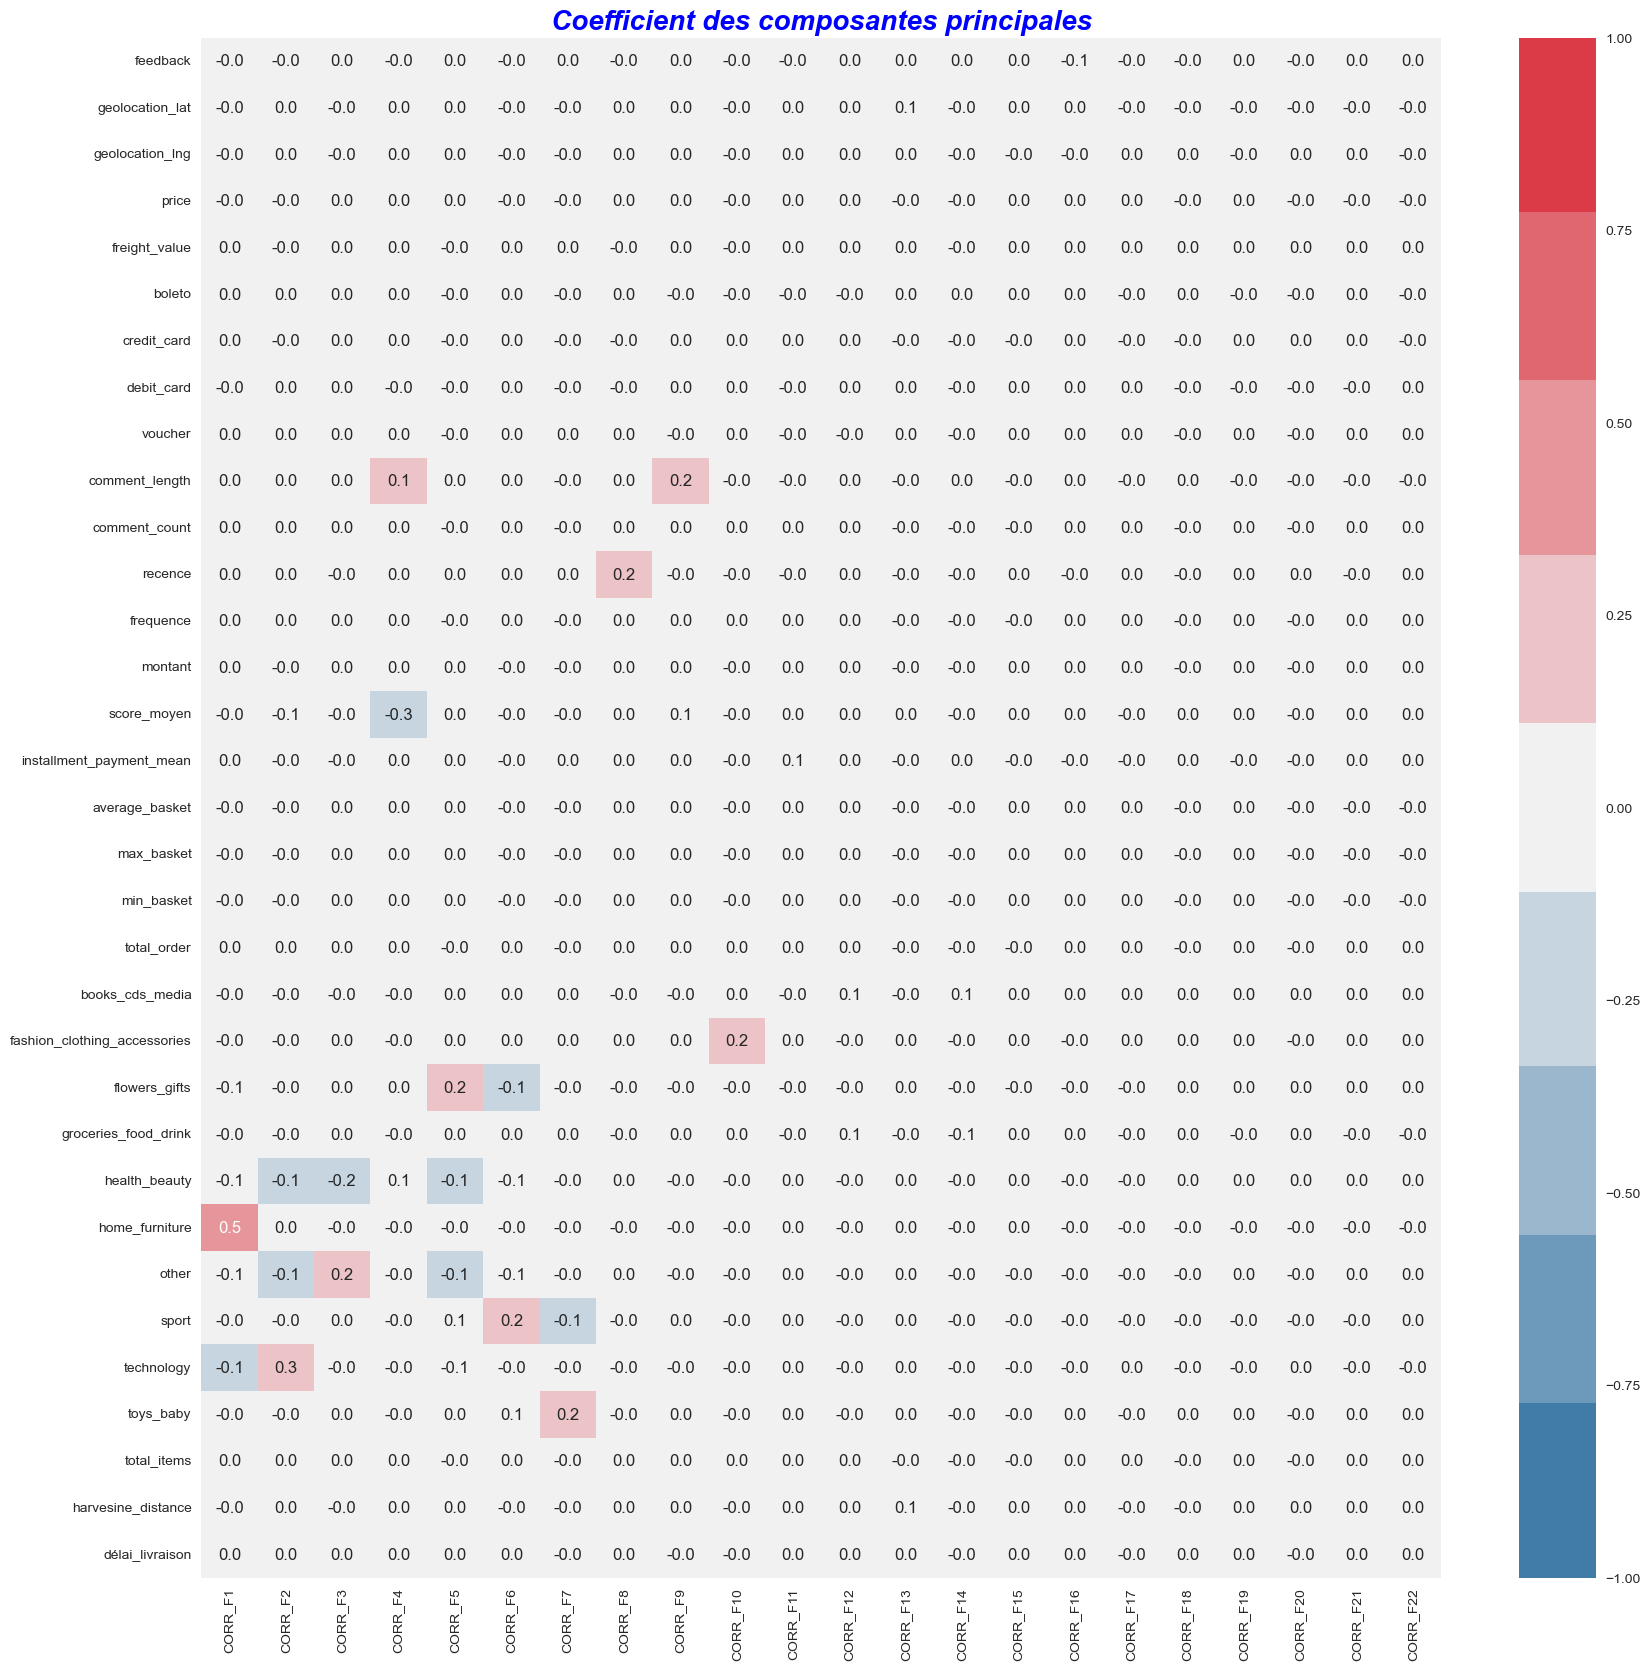

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))
palette = sns.diverging_palette(240, 10, n=9)
ax = sns.heatmap(corr_matrix, annot=True, fmt='.1f',
                 cmap=palette, vmin=-1, vmax=1, center=0)
plt.title('Coefficient des composantes principales', fontsize=20, color = "blue", fontweight = "bold", fontstyle = "italic")
plt.show()

Aucune variable n'est particulièrement corrélée à un axe. L'ACP a donc permis de réduire les corrélations préexistantes.

### <font color = "blue"> 3. Segmentation avec K-Means après ACP

#### <font color = "blue"> 3.1 Prepocessing

In [30]:
scaler = MinMaxScaler()
scaler.fit_transform(data_reduit)
data_acp = pd.DataFrame(scaler.fit_transform(data_reduit), columns = data_copy.columns)
print("Les cinq premières lignes du jeu de données à utiliser pour la modélisation")
data_acp.head()

Les cinq premières lignes du jeu de données à utiliser pour la modélisation


,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,comment_length,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,harvesine_distance,délai_livraison
0,0.953110,0.353657,0.451426,0.175805,0.298095,0.312166,0.311241,0.227164,0.688333,0.175744,...,0.127684,0.372802,0.309341,0.360517,0.208661,0.204023,0.084394,0.244956,0.314193,0.170168
1,0.101673,0.037191,0.037849,0.316728,0.050308,0.260299,0.287601,0.220745,0.259313,0.182482,...,0.125395,0.373338,0.309805,0.360583,0.208596,0.203514,0.084377,0.355043,0.315701,0.146461
2,0.129789,0.108381,0.909871,0.337430,0.050265,0.287273,0.319781,0.727631,0.156081,0.103536,...,0.126788,0.373053,0.309955,0.360329,0.208679,0.203045,0.084411,0.343372,0.314375,0.152586
3,0.016778,0.875492,0.425331,0.168621,0.229943,0.299934,0.313339,0.441507,0.285064,0.150203,...,0.126250,0.372818,0.310106,0.360483,0.208266,0.203696,0.084339,0.306177,0.315803,0.158185
4,0.013420,0.844415,0.405515,0.007578,0.233867,0.286931,0.311554,0.404224,0.322352,0.151089,...,0.126191,0.371736,0.309936,0.360307,0.208589,0.203560,0.084360,0.285355,0.309362,0.162388


#### <font color = "blue"> 3.2 Recherche du nombre optimal de groupe

In [31]:
def cluster_selection(data):
    
    # Recherche du meilleur nombre de clusters (k) avec la méthode du coude
    model1 = KMeans(n_init=10, random_state=42)
    visualizer1 = KElbowVisualizer(model1, k=(2, 12))
    visualizer1.fit(data)
    
    # Affichage de la figure du coude
    visualizer1.show()
    
    # Sélection du meilleur nombre de clusters (k)
    best_k = visualizer1.elbow_value_
    
    # Visualisation des silhouettes et des scores
    model2 = KMeans(best_k, n_init=10)
    visualizer2 = SilhouetteVisualizer(model2, colors="yellowbrick")
    visualizer2.fit(data)
    
    # Visualisation de la figure des silhouettes et des scores
    visualizer2.show()
    
    # Visualisation des distances inter-cluster
    model3 = KMeans(best_k, n_init=10)
    visualizer3 = InterclusterDistance(model3, normalized_stress=True)
    visualizer3.fit(data)
    
    # Visualisation de la figure des distances inter-cluster
    visualizer3.show()

Le graphique ci-dessus montre la réduction du score de distorsion à mesure que le nombre de clusters augmente. Cependant, il n'y a pas de "coude" clair visible. L'algorithme sous-jacent suggère 6 clusters. Toutefois, un choix de 7 ou 8 grappes semblerait juste. Nous conservons néanmoins le nombre de clusters à 6.

La réduction de dimenssion offre les mêmes axes de segmentation. Il est donc possible de réduire le nombre de features en entrée et d'utiliser les variables synthétiques de la PCA pour segmenter notre fichier client, ce d'autant que les scores silhouette sont ici meilleurs comparés au données brutes.

In [32]:
# Initialisation de la segmentation
kmeans = KMeans(n_clusters = 6, n_init = 10)

# Ajuster le modèle et prédire les clusters
kmeans_predict = kmeans.fit_predict(data_acp)
clusters_labels = kmeans.labels_
data_acp["Clusters"] = kmeans_predict

In [33]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5])

**_Analyse des clusters_**

_Visualisation graphique des clusters en réprésentation 2D_

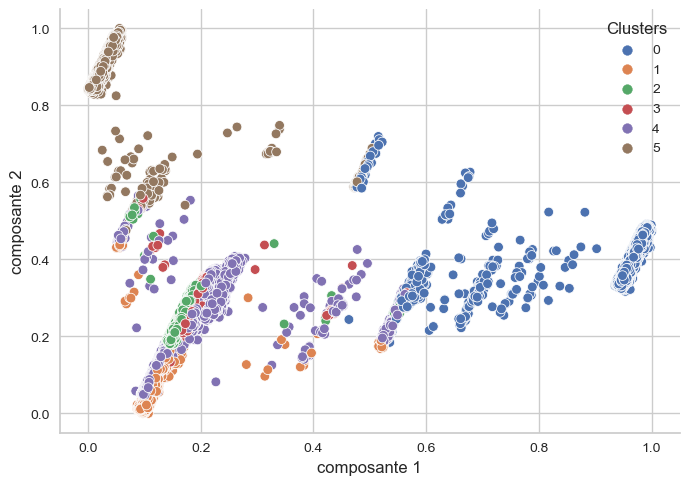

In [34]:
# Tracé des cluster en 2D avec les deux premières composantes
sns.scatterplot(data = data_acp, x = data_acp.iloc[:, 0], y = data_acp.iloc[:, 1], hue = "Clusters", palette = "deep")
plt.xlabel("composante 1")
plt.ylabel("composante 2")
sns.despine()
plt.show()

_Les représentations ci-dessus montrent que certains clusters présentent beaucoup de similitude. Ceci est très propablement dû à la fréquence d'achat quasi identique pour tous les clients._

_Taille des clusters_

In [35]:
# Regroupement des données par segment et calcul des moyennes
taille_cluster = data_acp.groupby("Clusters").size().to_frame()
taille_cluster.columns = ["kmeans_size"]
total_effectif = taille_cluster.sum()  # Calcul du total des effectifs
taille_cluster['Pourcentage_kmeans'] = round((taille_cluster / total_effectif) * 100) # Calcul du pourcentage des effectifs

# Visualisation du résultat
taille_cluster

,kmeans_size,Pourcentage_kmeans
Clusters,,
0,27766,30.0
1,11251,12.0
2,8721,10.0
3,7163,8.0
4,22273,24.0
5,14051,15.0


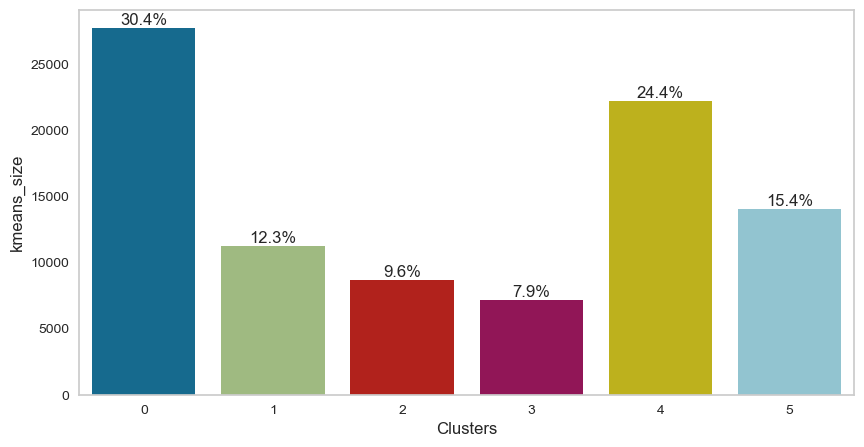

In [36]:
# Visualisation des données
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot = sns.barplot(x = taille_cluster.index, y = taille_cluster["kmeans_size"], ax = ax)

# Ajouter les pourcentages des effectifs sur les barres
total = sum(taille_cluster["kmeans_size"])
for bar in bar_plot.patches:
    height = bar.get_height()
    percentage = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Afficher le graphique à barres
plt.grid(False)
plt.show()

_Le cluster numéro regroupe 30,41% des clients, le cluster 4 lui regroupe 20% dess clients. Ci-dessous on peut observer les caractéristiques de chaque cluster dans différentes catégories en utilisant un graphique en étoile à plusieurs axes (radar plot)_

In [37]:
# Regroupement des données par segment et calcul des moyennes
data1 = data_acp.groupby("Clusters").mean()
data1.head()

,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,comment_length,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,harvesine_distance,délai_livraison
Clusters,,,,,,,,,,,,,,,,,,,,,
0,0.949252,0.367875,0.451590,0.208363,0.298104,0.334244,0.321943,0.348566,0.350052,0.175546,...,0.125209,0.372313,0.310280,0.360286,0.208414,0.203610,0.084389,0.344142,0.311188,0.149836
1,0.106465,0.040559,0.036815,0.315717,0.063224,0.263093,0.295057,0.353929,0.349317,0.155423,...,0.125203,0.372319,0.310257,0.360278,0.208400,0.203561,0.084391,0.344141,0.311188,0.149837
2,0.157621,0.215910,0.481366,0.271040,0.952285,0.038917,0.249803,0.343948,0.342212,0.142925,...,0.125229,0.372326,0.310331,0.360267,0.208320,0.203580,0.084375,0.344143,0.311178,0.149836
3,0.178375,0.243439,0.464589,0.197910,0.524172,0.927555,0.023471,0.329289,0.351706,0.125254,...,0.125212,0.372321,0.310301,0.360255,0.208362,0.203609,0.084367,0.344142,0.311191,0.149836
4,0.159422,0.174182,0.679692,0.202478,0.237729,0.384510,0.499887,0.363638,0.354588,0.258799,...,0.125212,0.372321,0.310317,0.360277,0.208415,0.203607,0.084414,0.344140,0.311175,0.149836


In [38]:
# Tracé des radar
plot_radars(data1, "Clusters")

In [39]:
data1.reset_index(inplace=True)
data1

,Clusters,feedback,geolocation_lat,geolocation_lng,price,freight_value,boleto,credit_card,debit_card,voucher,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,harvesine_distance,délai_livraison
0,0,0.949252,0.367875,0.451590,0.208363,0.298104,0.334244,0.321943,0.348566,0.350052,...,0.125209,0.372313,0.310280,0.360286,0.208414,0.203610,0.084389,0.344142,0.311188,0.149836
1,1,0.106465,0.040559,0.036815,0.315717,0.063224,0.263093,0.295057,0.353929,0.349317,...,0.125203,0.372319,0.310257,0.360278,0.208400,0.203561,0.084391,0.344141,0.311188,0.149837
2,2,0.157621,0.215910,0.481366,0.271040,0.952285,0.038917,0.249803,0.343948,0.342212,...,0.125229,0.372326,0.310331,0.360267,0.208320,0.203580,0.084375,0.344143,0.311178,0.149836
3,3,0.178375,0.243439,0.464589,0.197910,0.524172,0.927555,0.023471,0.329289,0.351706,...,0.125212,0.372321,0.310301,0.360255,0.208362,0.203609,0.084367,0.344142,0.311191,0.149836
4,4,0.159422,0.174182,0.679692,0.202478,0.237729,0.384510,0.499887,0.363638,0.354588,...,0.125212,0.372321,0.310317,0.360277,0.208415,0.203607,0.084414,0.344140,0.311175,0.149836
5,5,0.020397,0.871319,0.430091,0.169428,0.223759,0.298236,0.307576,0.347156,0.349531,...,0.125240,0.372301,0.310167,0.360277,0.208416,0.203601,0.084378,0.344142,0.311186,0.149837


**Description des clusters :** <br>
* **Clients du cluster 0 :**
    - Ces clients sont intéressés par 4 catégories de produit : "sport", "autre", "technology" et "flowers-gifts" ;
    - Ils paient en plusieurs fois et utilisent 3 principaux moyens de paiement : "voucher", "credit-card" et "boleto" ;
    - Ils résident proche de Olist et bénéficient de courts délais de livraison.
* **Clients du Cluster 1 :**
    - C'est le cluster le plus important en terme d'effectif. Il regroupe 30% des clients de l'entreprise ;
    - Clients résidents loin de Olist et dont les délais de livraisons sont allongés ;
    - Ils préfèrent les articles relatifs aux bien être : "sport", "santé et beauté" et "autre" ;
    - Ce sont des nouveaux clients (recence faible) et ils semblent avoir une préférence pour les articles à la livraison gratuite. Ils payent leurs commandes en plusieurs fois et non pas de moyen de paiement préféré ;
    - Ils ont un niveau de satisfaction moyen.
* **Clients du Cluster 2 :**
    - Ce cluster compte seulement 9% des clients de la plate-forme. Cependant, ces clients sont ceux qui dépensent le plus et pricipalement dans les produits alimentaires et de santé/beauté ;
    - Ils vivent proches de Olist et pourtant leurs frais de livraison sont très important ;
    - Ils laissent rarement de feedback et n'ont attribué aucune note sur leur expérience d'achat. Ils règlent leurs achats en une fois.
* **Clusters 3 :**
    - Ces clients sont peu nombreux. Ils préfèrent les artciles de type alimentaire et de sport, ils résident loin de Olist et n'ont pas l'avantage d'être rapidement livré ;
    - Leus derniers achats commencent à dater, et dans l'ensemble ils ont une satisfaction modéré et laisse toujours des commentaires après chaque achat ;
    - Leur panier moyen est élevé et ils préfèrent payer par des bons et en espèces et règlent leurs acahts en une fois.
* **Clusters 4 :**
    - Ce sont les clients intéressés par la mode, la beauté et le sport. Ils utilisent la carte de crédit comme moyen de paiement préféré.
    - Ces clienst sont plutôt insatisfait de leurs expériences d'achats. Ils ont effectués en moyenne un plus d'un achat et ont toujours laissé des commentaires.
* **Clusters 5 :**
    - C'est le deuxième clusters le plus important en terme d'effectif, avec un peu plus de 20% des clients de la plate-forme ;
    - Difficile de savoir de savoir quelle catégorie de produits les attirent, ils semblent intéressés par tous les types de produits ;
    - Ce sont les clients les plus anciens de la plateforme, ils sont très satisfait de leurs expériences d'achats, mais malheuresement n'ont effectué qu'un seul achat sur la "market place" d'Olist ;
    - Les montants de leurs paniers moyens et minimuns sont les plus élevés, et ils utilisent tous les moyens de paiement excepté la carte de crédit et paient en plusieurs fois. 



#### <font color = "blue"> 4. Etude de la stabilité à l'initialisation du K-Means

La classification ci-dessus est réalisée avec la méthode K-Means++. Cependant, afin de s'assurer de la stabilité de ce modèle, je vais entraîner le modèle plusieurs fois sans définir le "random_state" et calculer les indices ARI, AMI et l'homogénéïté. Je vais me servir des clusters calculés avec la réduction de diension.

In [44]:
# Extraction des composantes principales de la matrice data_reduit
data_stable = data_reduit[:,:10]

labels = kmeans_predict 

In [45]:
import pandas as pd
from time import time

results_list = []

def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[1].inertia_]
    
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    results_list.append(results)
    
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

for i in range(10):
    imodel = KMeans(n_clusters=6, n_init=1, init="k-means++")
    bench_k_means(model=imodel, name="Iter " + str(i), data=data_stable, labels=labels)

column_names = ['Iteration', 'Temps d\'ajustement', 'Inertia', 'Homogénéité', 'ARI', 'AMI']
df_results = pd.DataFrame(results_list, columns=column_names)

mean_metrics = df_results[['Temps d\'ajustement', 'Inertia', 'Homogénéité', 'ARI', 'AMI']].mean()
mean_metrics_row = pd.DataFrame([mean_metrics.values], columns=mean_metrics.index)
df_results = pd.concat([df_results, mean_metrics_row], ignore_index=True)

df_results.fillna("Moyenne", inplace=True)
df_results


Iter 0   	0.380s	15412	0.890	0.813	0.890
Iter 1   	0.095s	17395	0.862	0.808	0.894
Iter 2   	0.165s	16332	0.814	0.736	0.822
Iter 3   	0.105s	15398	0.999	1.000	0.999
Iter 4   	0.105s	15412	0.890	0.813	0.891
Iter 5   	0.123s	15398	0.999	1.000	0.999
Iter 6   	0.097s	15878	0.870	0.797	0.885
Iter 7   	0.142s	16332	0.814	0.736	0.822
Iter 8   	0.118s	16332	0.814	0.736	0.822
Iter 9   	0.145s	17253	0.785	0.690	0.805


,Iteration,Temps d'ajustement,Inertia,Homogénéité,ARI,AMI
0,Iter 0,0.379530,15412.402567,0.890037,0.812998,0.890482
1,Iter 1,0.094568,17395.496736,0.862303,0.807531,0.894436
2,Iter 2,0.165319,16332.377799,0.814335,0.735957,0.822451
3,Iter 3,0.105366,15398.493456,0.999400,0.999767,0.999397
4,Iter 4,0.104634,15412.402082,0.890233,0.813130,0.890667
5,Iter 5,0.122876,15398.493372,0.999336,0.999752,0.999331
6,Iter 6,0.097096,15878.037976,0.869870,0.796781,0.885014
7,Iter 7,0.142133,16332.377923,0.814335,0.735957,0.822451
8,Iter 8,0.117874,16332.377532,0.814335,0.735944,0.822446
9,Iter 9,0.144796,17252.921247,0.785275,0.690037,0.805480


**Conclusion :** <br> L'algorithme K-Means permet d'offrir une bonne segmentation à ce jeu de données et est offre une bonne stabilité au regard des différentes métriques utilisées. <br> Afin de mieux apprécier la performace de cette algorithme, je vais procéder à la segmentation avec deux autres algorithmes (BDScan et agglomerative clustering) et comparer les résultats à ceux du K-Means.

**_Importance des variables pour cette segmentation_**

#### <font color = "blue"> 5. Clustering avec l'algorithme DBScan

Dans cette section, je vais manipuler les données avec l'algorithme DBScan et analyser la segmentation qui en résulte. <br>
Je commence par la mise à l'échelle des données.

**_Définition des paramètres DBSCAN_** <br> DBSCan prend en compte deux principaux paramètres : epsilon (eps) qui définit la distance maximale entre deux points et min_samples qui définit le nombre minimum de voisins qu'un point donné doit avoir pour être classé comme point central. Afin de déterminer automatiquement la valeur optimale pour eps, je vais me servir de l'algorithme NearestNeighbors de scikitlearn.

In [46]:
# Copie du jeu de données
x = data_reduit.copy()

# Standardisation des données
data_db = MinMaxScaler().fit_transform(x)

In [47]:
# Définition des paramètres pour obtenir le même nombre de clusters qu'avec k-means (6 clusters)

eps = 0.5  # Valeur de la distance maximale entre les points
min_samples = 5 # Nombre minimum de points dans un voisinage pour être considéré comme un noyau

**_Application du DBSCAN_**

In [48]:
# Intanciation de la classe DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_db)

In [49]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [50]:
# Calcul du nombre de clusters dans les étiquettes, en ignorant le bruit s'il est présent
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print("Estimation du nombre de cluster : %d" % n_clusters_)
print("Estimation du nombre de points de bruit : %d" % n_noise_)

Estimation du nombre de cluster : 6
Estimation du nombre de points de bruit : 62


**_Calcul des métrics_**

In [51]:
# Définition des labels
labels_true = data_copy.index
labels = clusters

In [52]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [53]:
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Création d'une instance de la classe DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
start_time = time.time()
dbscan.fit(data_db)
end_time = time.time()

# Tableau de toutes les étiquettes de cluster attribuées à chaque point de données
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

homogeneity = metrics.homogeneity_score(labels_true, labels)
adjusted_rand_index = metrics.adjusted_rand_score(labels_true, labels)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(labels_true, labels)

# Calcul du temps d'ajustement
adjustment_time = end_time - start_time

# Calculer l'inertie du modèle DBSCAN (somme des distances au carré des échantillons à leur centre de cluster le plus proche)
inertia = 0.0
if hasattr(dbscan, 'core_sample_indices_') and hasattr(dbscan, 'components_'):
    core_samples_indices = dbscan.core_sample_indices_
    components = dbscan.components_
    for i in core_samples_indices:
        distances = np.linalg.norm(data_db[i] - components, axis=1)
        inertia += np.min(distances)


results = {
    "Temps d'ajustement": adjustment_time,
    "Inertia": inertia,
    "Homogénéité": homogeneity,
    "ARI": adjusted_rand_index,
    "AMI": adjusted_mutual_info,
    
}

df = pd.DataFrame(results, index=[0])
df

,Temps d'ajustement,Inertia,Homogénéité,ARI,AMI
0,1138.991779,0.0,0.002515,0.0,1.230549e-13


_Les scores des différentes métriques sont quasi nuls, l'algorithme DBScan ne semble pas performant pour ces données. Avant de tirer une conclusion définitive, je vais avalyser les clusters formés_ 

**_Analyse des clusters obtenus avec DBScan_**

_Visualisation graphique_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


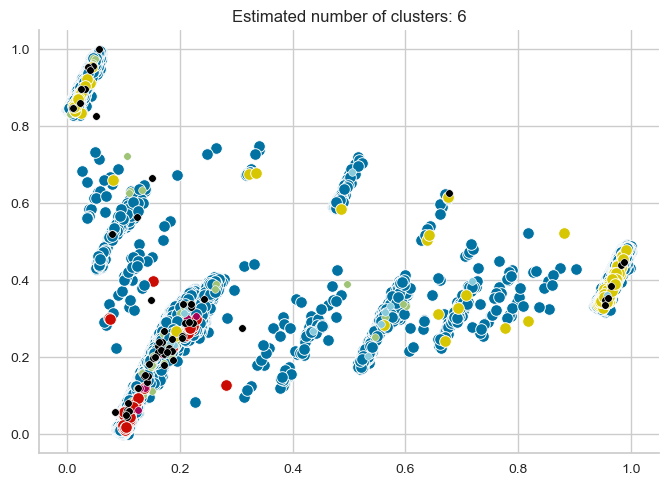

In [54]:
# Création d'un ensemble d'étiquettes uniques à partir de la variable 'labels'.
unique_labels = set(labels)

# Utilisation de la palette de couleur "deep" de seaborn
palette = "deep"

# Création d'une figure avec seaborn
fig, ax = plt.subplots()

# Boucle pour traiter chaque étiquette unique
for k in unique_labels:
    # Si l'étiquette est -1, elle correspond aux points de bruit (noise), et la couleur est définie sur noir.
    if k == -1:
        color = "black"
    else:
        color = None

    # Création d'un masque booléen indiquant quels points de données appartiennent à l'étiquette actuelle 'k'.
    class_member_mask = (labels == k)

    # Extraction des coordonnées des points principaux (core samples) appartenant à l'étiquette 'k'.
    xy = data_db[class_member_mask & core_samples_mask]

    # Tracé des points principaux avec seaborn scatterplot
    sns.scatterplot(x=xy[:, 0], y=xy[:, 1], color=color, marker='o', s=70, ax=ax)

    # Extraction des coordonnées des points non principaux appartenant à l'étiquette 'k'.
    xy = data_db[class_member_mask & ~core_samples_mask]

    # Tracé des points non principaux avec seaborn scatterplot
    sns.scatterplot(x=xy[:, 0], y=xy[:, 1], color=color, marker='o', s=30, ax=ax)

# Ajout d'un titre au graphique indiquant le nombre estimé de clusters.
ax.set_title('Estimated number of clusters: %d' % n_clusters_)

# Affichage du graphique avec seaborn
sns.despine()
plt.legend()
plt.show()


_La représentation ci-dessus montre que les clients sont regroupés autour d'un seul cluster (cluster de couleur bleue). Observons la taille de chaque clusters_

In [55]:
# conversion des données en dataframe
data_dbscan = pd.DataFrame(data_db, columns = data_copy.columns)
# Ajout des clusters dans la base de données
data_dbscan["Clusters"] = clusters

# Regroupement des données par segment et calcul des moyennes
size_clusters = data_dbscan.groupby("Clusters").size().to_frame()
size_clusters.columns = ["Effectifs_dbscan"] # Renommer la colonne
effectifs_total = size_clusters.sum()  # Calcul du total des effectifs
size_clusters['Pourcentage_dbscan'] = round((size_clusters / effectifs_total) * 100, 1) # Calcul du pourcentage des effectifs

# Visualisation du résultat
size_clusters

,Effectifs_dbscan,Pourcentage_dbscan
Clusters,,
-1,62,0.1
0,90895,99.6
1,12,0.0
2,177,0.2
3,24,0.0
4,48,0.1
5,7,0.0


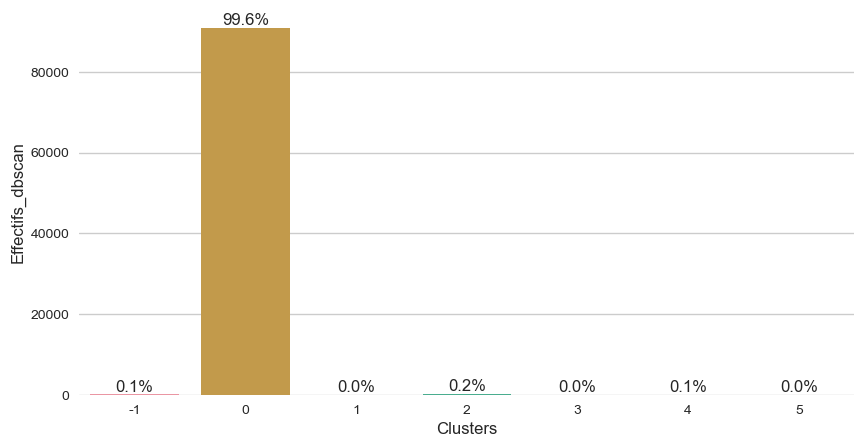

In [56]:
# Visualisation des données
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot = sns.barplot(x=size_clusters.index, y=size_clusters["Effectifs_dbscan"])

# Ajouter les pourcentages des effectifs sur les barres
total = sum(size_clusters["Effectifs_dbscan"])
for bar in bar_plot.patches:
    height = bar.get_height()
    percentage = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')
sns.despine(left=True, bottom=True)
plt.show()

_Plus de 99% des clients appartiennent au cluster numéro 0. L'algorithme ne parvient donc pas à segmenter les clients de ce jeu données._ <br> Je vais observer la segmentation un autre algorithme et comparer son résultat à celui du K-Means.

#### <font color = "blue"> 6. Clustering agglomératif

Cette classification est très gourmande en ressource, il est assez difficile de l'exécuter sur plus de 35.000 clients. Je vais donc procéder de manière aléatoire à un échantillonnage des données.

In [57]:
# Réduction de la taille du jeu de données à 20.000 clients
data_agglo = pd.DataFrame(data_reduit, columns = data_copy.columns).sample(frac = 0.25, random_state = 42).copy()
X_reduit = data_agglo.values
X_names = data_agglo.index

Elbow Method to determine the number of clusters to be formed:


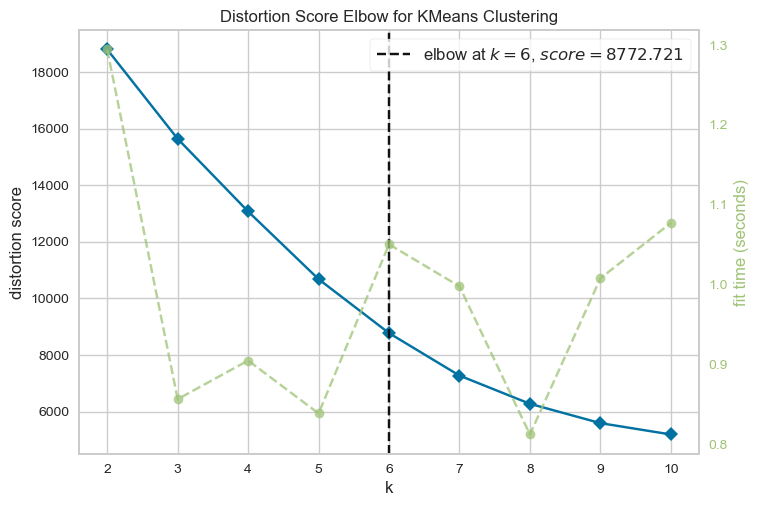

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
# Examination rapide de la méthode du coude pour trouver le nombre de clusters à réaliser.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init = 10, random_state = 42), k=10)
Elbow_M.fit(data_agglo)
Elbow_M.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=6)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_agglo)
data_agglo["Clusters"] = yhat_AC

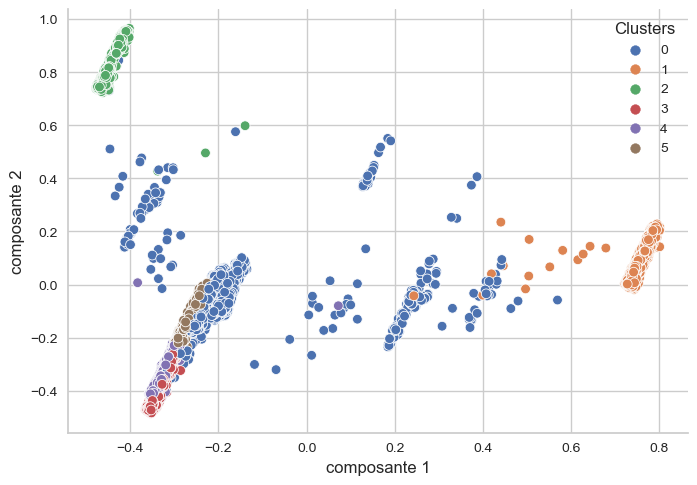

In [60]:
# Tracé des cluster en 2D avec les deux premières composantes
sns.scatterplot(data = data_agglo, x = data_agglo.iloc[:, 0], y = data_agglo.iloc[:, 1], hue = "Clusters", palette = "deep")
plt.xlabel("composante 1")
plt.ylabel("composante 2")
sns.despine()
plt.show()

In [61]:
import numpy as np
import pandas as pd
import time
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform



X = data_agglo

# Calculer les distances par paires entre les échantillons
dist_matrix = squareform(pdist(X))

# Ajuster le modèle de clustering agglomératif
agg_cluster = AgglomerativeClustering(n_clusters=6)
start_time = time.time()
agg_cluster.fit(X)
end_time = time.time()

# Calcul du score ARI
ari = adjusted_rand_score(X_names, agg_cluster.labels_)

# Calcul du score AMI
ami = adjusted_mutual_info_score(X_names, agg_cluster.labels_)

# Calcul de l'homogénéité
homogeneity = homogeneity_score(X_names, agg_cluster.labels_)

# Calculate the time of adjustment
adjustment_time = end_time - start_time

# Calculer l'inertie approximative
inertia = 0.0
for cluster_id in np.unique(agg_cluster.labels_):
    cluster_indices = np.where(agg_cluster.labels_ == cluster_id)[0]
    cluster_distances = dist_matrix[cluster_indices][:, cluster_indices]
    inertia += np.mean(cluster_distances)

results = {
    "Temps d'ajustement": adjustment_time,
    "Homogénéité": homogeneity,
    "ARI": ari,
    "AMI": ami,
    "Inertie approximative": inertia
}

df = pd.DataFrame(results, index=[0])
df

,Temps d'ajustement,Homogénéité,ARI,AMI,Inertie approximative
0,44.66579,0.170183,0.0,-2.234586e-11,4.402152


**_Remarque :_** _l'inertie n'est pas directement disponible pour l'algorithme de clustering agglomératif. Alors pour évaluer l'algorithme de clustering agglomératif en utilisant une mesure de dispersion des points, j'ai utiliser la distance moyenne entre les points dans chaque cluster comme approximation de l'inertie : En bref, l'inertie obenue n'est qu'une approximation_

In [62]:
np.unique(agg_cluster.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [63]:
# Regroupement des données par segment et calcul des moyennes
taille_agglo = data_agglo.groupby("Clusters").size().to_frame()
taille_agglo.columns = ["Effectifs_agglo"] # Renommer la colonne
total_effectifs = taille_agglo.sum()  # Calcul du total des effectifs
taille_agglo['Pourcentage_agglo'] = round((taille_agglo / total_effectifs) * 100) # Calcul du pourcentage des effectifs

# Visualisation du résultat
taille_agglo

,Effectifs_agglo,Pourcentage_agglo
Clusters,,
0,4892,21.0
1,6866,30.0
2,3443,15.0
3,2744,12.0
4,2700,12.0
5,2161,9.0


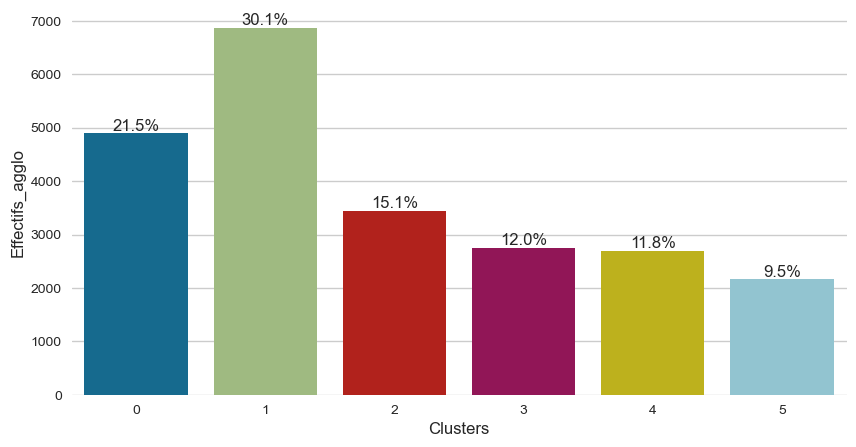

In [64]:
# Visualisation des données
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot = sns.barplot(x=taille_agglo.index, y=taille_agglo["Effectifs_agglo"])

# Ajouter les pourcentages des effectifs sur les barres
total = sum(taille_agglo["Effectifs_agglo"])
for bar in bar_plot.patches:
    height = bar.get_height()
    percentage = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')
sns.despine(left=True, bottom=True)
plt.show()


Text(0, 0.5, 'Distance')

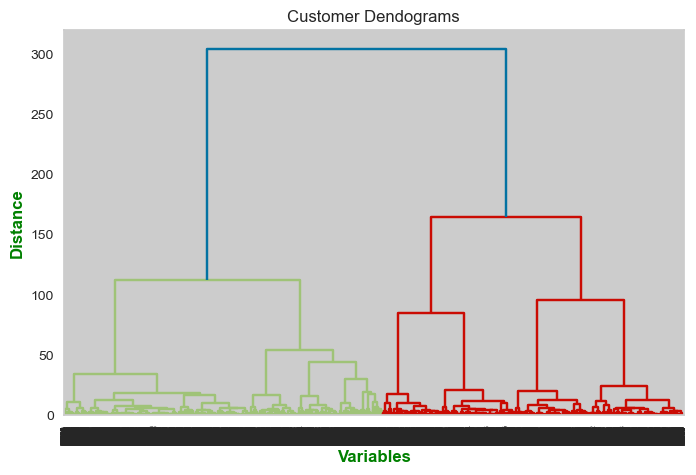

In [65]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8, 5))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data_agglo, method='ward'))

plt.xlabel("Variables", color = "green", fontsize = 12, fontweight = "bold")
plt.ylabel("Distance", color = "green", fontsize = 12, fontweight = "bold")

#### <font color = "blue"> 7. Comparaison des modèles

Comparaison des 3 modèles et sélection du modèle le plus performant pour ce jeu de données. <br>
Le tableau ci-dessous montre les tailles des clusters créés. Veuillez noter que la numérotation des clusters est différente dans chaque méthode, par ex. le cluster n°0 dans K-Means est équivalent au cluster n°2 dans DBSCAN et n°2 dans Affinity Propagation.

In [66]:
clusters = pd.concat([taille_cluster, size_clusters, taille_agglo], axis=1, sort=False)
clusters.drop(columns = ["kmeans_size", "Effectifs_dbscan", "Effectifs_agglo"], inplace=True)
clusters.fillna(0, inplace=True)
clusters

,Pourcentage_kmeans,Pourcentage_dbscan,Pourcentage_agglo
Clusters,,,
0,30.0,99.6,21.0
1,12.0,0.0,30.0
2,10.0,0.2,15.0
3,8.0,0.0,12.0
4,24.0,0.1,12.0
5,15.0,0.0,9.0
-1,0.0,0.1,0.0


D'après les comparaisons ci-dessus, il est clair que DBSCAN n'a pas réussi à générer des clusters raisonnables. C'est très probablement parce que DBCSAN essaie de trouver des clusters en fonction de la densité de points. Si l'un de nos clusters est moins dense que les autres, DBSCAN produira des résultats sous-optimaux en ne reconnaissant pas le groupe le moins dense en tant que cluster. À leur tour, les algorithmes K-Means et agglomerative clustering ont créé 6 clusters raisonnables. Afin de déterminer lequel modélise le mieux ces données, je vais comparer leurs métriques calculer.

In [67]:
print("Métriques du clustering agglomératif")
df

Métriques du clustering agglomératif


,Temps d'ajustement,Homogénéité,ARI,AMI,Inertie approximative
0,44.66579,0.170183,0.0,-2.234586e-11,4.402152


In [68]:
print("Métriques du clustering avec KMeans")
df_results.tail(1)

Métriques du clustering avec KMeans


,Iteration,Temps d'ajustement,Inertia,Homogénéité,ARI,AMI
10,Moyenne,0.147419,16114.538069,0.873946,0.812785,0.883215


Avec le Kmeans on obtiens de meilleurs scores. Je vais donc le conserver comme model pour ce jeu de données et procéder à l'analyse de sa stabilité temporelle.

In [69]:
# Récupération du jeu de données ayant servit à la segmentation et rajout de la colonne "order_purchase_timestamp"
data_model = data_copie.drop(selected_columns, axis=1)
# Sauvegarde des données pour l'évaluation de la stabilité temporelle
data_model.to_csv("data_olist.csv", index=True)

In [70]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91225 entries, ('0000366f3b9a7992bf8c76cfdf3221e2', '0000366f3b9a7992bf8c76cfdf3221e2', '0000366f3b9a7992bf8c76cfdf3221e2') to ('ffffd2657e2aad2907e67c3e9daecbeb', 'ffffd2657e2aad2907e67c3e9daecbeb', 'ffffd2657e2aad2907e67c3e9daecbeb')
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_purchase_timestamp      91225 non-null  object 
 1   feedback                      91225 non-null  int64  
 2   geolocation_lat               91225 non-null  float64
 3   geolocation_lng               91225 non-null  float64
 4   price                         91225 non-null  float64
 5   freight_value                 91225 non-null  float64
 6   boleto                        91225 non-null  float64
 7   credit_card                   91225 non-null  float64
 8   debit_card                    91225 non-null  float64
 9   voucher                       91